
## The dataset

| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Netflix-dataset.csv')

In [14]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"""João Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"""August 14, 2020""",2020,4,"""In a future where the elite inhabit an island...",International TV
1,s2,Movie,7:19,Jorge Michel Grau,"""Demián Bichir, Héctor Bonilla, Oscar Serrano,...",Mexico,"""December 23, 2016""",2016,93,"""After a devastating earthquake hits Mexico Ci...",Dramas
2,s3,Movie,23:59,Gilbert Chan,"""Tedd Chan, Stella Chung, Henley Hii, Lawrence...",Singapore,"""December 20, 2018""",2011,78,"""When an army recruit is found dead, his fello...",Horror Movies
3,s4,Movie,9,Shane Acker,"""Elijah Wood, John C. Reilly, Jennifer Connell...",United States,"""November 16, 2017""",2009,80,"""In a postapocalyptic world, rag-doll robots h...",Action
4,s5,Movie,21,Robert Luketic,"""Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...",United States,"""January 1, 2020""",2008,123,A brilliant group of students become card-coun...,Dramas


In [51]:
data.shape

(7787, 11)

In [62]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
duration           0
description        0
genre              0
dtype: int64

In [65]:
data.duplicated().sum()


0

In [66]:
data.describe()

,release_year,duration
count,7787.000000,7787.000000
mean,2013.932580,69.122769
std,8.757395,50.950743
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.000000
75%,2018.000000,106.000000
max,2021.000000,312.000000


In [13]:
# Filter the data to remove TV shows.

data_filter = data[data['type'] != 'TV Show' ]
data_filter


,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"""Demián Bichir, Héctor Bonilla, Oscar Serrano,...",Mexico,"""December 23, 2016""",2016,93,"""After a devastating earthquake hits Mexico Ci...",Dramas
2,s3,Movie,23:59,Gilbert Chan,"""Tedd Chan, Stella Chung, Henley Hii, Lawrence...",Singapore,"""December 20, 2018""",2011,78,"""When an army recruit is found dead, his fello...",Horror Movies
3,s4,Movie,9,Shane Acker,"""Elijah Wood, John C. Reilly, Jennifer Connell...",United States,"""November 16, 2017""",2009,80,"""In a postapocalyptic world, rag-doll robots h...",Action
4,s5,Movie,21,Robert Luketic,"""Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...",United States,"""January 1, 2020""",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"""Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahme...",Egypt,"""June 1, 2020""",2019,95,"""After an awful accident, a couple admitted to...",Horror Movies


In [16]:
# Investigate and subset the Netflix movie data, keeping only the columns "title","country","genre","release_year","duration".

data_subset = data_filter[['title','country','genre','release_year', 'duration']]
data_subset


,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95
...,...,...,...,...,...
7781,Zoom,United States,Children,2006,88
7782,Zozo,Sweden,Dramas,2005,99
7783,Zubaan,India,Dramas,2015,111
7784,Zulu Man in Japan,NaN,Documentaries,2019,44


In [67]:
# Filter netflix_movies to find the movies that are strictly shorter than 60 minutes

short_movies = data_filter[data_filter['duration'] < 60 ]
short_movies

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
35,s36,Movie,#Rucker50,Robert McCullough Jr.,NaN,United States,"""December 1, 2016""",2016,56,This documentary celebrates the 50th anniversa...,Documentaries
55,s56,Movie,100 Things to do Before High School,NaN,"""Isabela Moner, Jaheem Toombs, Owen Joyner, Ja...",United States,"""November 2, 2019""",2014,44,"""Led by seventh-grader C.J., three students wh...",Uncategorized
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"""Oprah Winfrey, Ava DuVernay""",NaN,"""January 26, 2017""",2017,37,"""Oprah Winfrey sits down with director Ava DuV...",Uncategorized
101,s102,Movie,3 Seconds Divorce,Shazia Javed,NaN,Canada,"""June 15, 2019""",2018,53,"""A Muslim women's activist group in India prot...",Documentaries
146,s147,Movie,A 3 Minute Hug,Everardo González,NaN,Mexico,"""October 28, 2019""",2019,28,This documentary captures the joy and heartbre...,Documentaries
...,...,...,...,...,...,...,...,...,...,...,...
7679,s7680,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,"""March 31, 2017""",1943,45,Filmmaker John Huston narrates this Oscar-nomi...,Documentaries
7692,s7693,Movie,Ya no estoy aquí: Una conversación entre Guill...,NaN,"""Guillermo del Toro, Alfonso Cuarón""",NaN,"""November 3, 2020""",2020,15,Guillermo del Toro and Alfonso Cuarón discuss ...,Documentaries
7718,s7719,Movie,Yoo Byung Jae: Discomfort Zone,Y. Joon Chung,Yoo Byung Jae,South Korea,"""August 17, 2018""",2018,54,Daring comedian Yoo Byung-jae connects critici...,Stand-Up
7771,s7772,Movie,Zion,Floyd Russ,Zion Clark,United States,"""August 10, 2018""",2018,12,"""Born without legs and stuck in foster care fo...",Documentaries


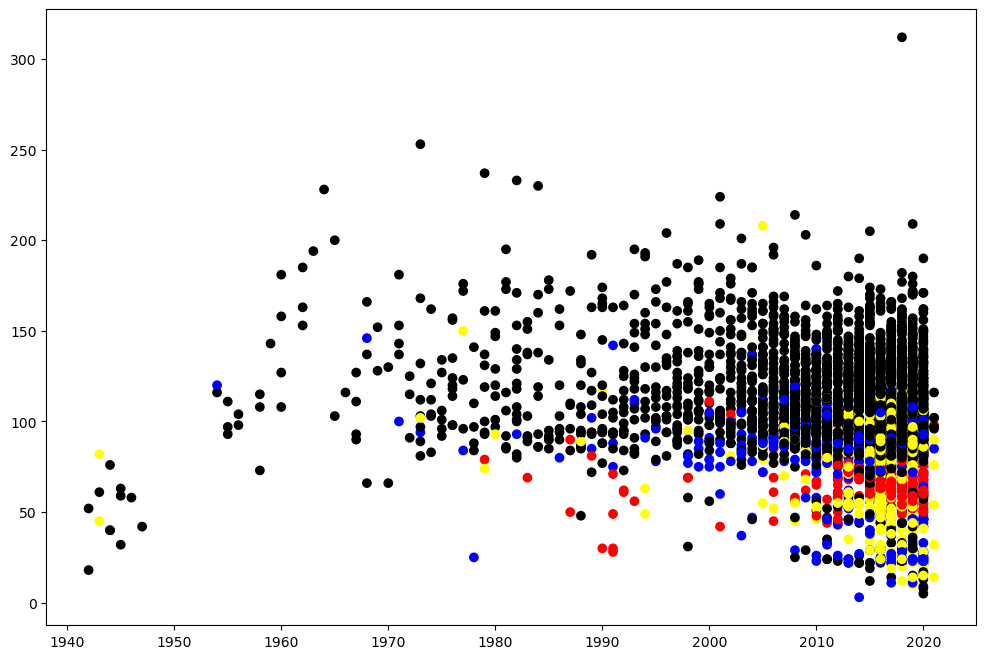

In [48]:
colours = []
for index, rows in data_filter.iterrows():
    genre = rows['genre']
    
    if genre == 'Children':
        colours.append('blue')
    elif genre == 'Documentaries':
        colours.append('yellow')
    elif genre == "Stand-Up":
        colours.append('red')
    else:
        colours.append('black')
        
# Initialize matplotlib figure object
fig = plt.figure(figsize=(12, 8))

# Create scatter plot
plt.scatter(data_filter['release_year'] , data_filter['duration'], c=colours[:len(data_filter)])


plt.xlabel = 'Release year'
plt.ylabel = 'Duration (min)'
plt.title = 'Movie Duration by Year of Release'
plt.show()

To answer the question based on our analysis, the answer is **NO** movies are not getting shorter by years.